# Finch Carr: PHYS 434 AB - Lab 01

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

# A little statistics
## Section 1.1.B)  
- First, I want to find probability values for certain z-scores in a Standard Normal Distribution using Python

- The 'stats.norm.cdf()' function for a Standard Normal Distribution takes 3 parameters including your input z-score, loc = $\mu$ = 0, and scale = $\sigma$ = 1
  - A z-score is a measurement that tells you how many standard deviations away your value is from the mean, so a z-score of 1 is 1 standard deviation away from the mean of that specific distribution
  - The 'stats.norm.cdf()' function takes that z-score, and the parameters of the distribution, and returns a probability value for finding any value from -$\infty$ to the associated x-input of that specific z-score on that specific distribution

- The example of **z** = 0.69 (i.e. 0.69 std. deviations away) should return a probability value of 0.7549... when input into the 'stats.norm.cdf' function, which integrates from negative infinity to the value provided in the standard normal distribution to return a probability. If I input 1, I should receive a probability of 84.1%... which is equivalent to a sigma of 50% (from the side of the distribution less than zero on the x-axis) and 34.1% from the 1st sigma to the right of the mean

In [2]:
stats.norm.cdf(1, loc = 0, scale = 1)

0.8413447460685429

- From the output above, I see that my estimation was correct

- Next example: a **z**" = 1.5 should return an output of 93.31% (0.9331...) according to the table provided

In [3]:
stats.norm.cdf(1.5, loc = 0, scale = 1)

0.9331927987311419

- The correct answer was estimated using the supplied z-table

## Section 1.1.C)
- I can now use the inverse function 'stats.norm.ppf()' to return a z-score value from inputting the probability value [i.e. the probability value (our original output) is returned and the z-value (our original input) should be found at that corresponding intersection on the table]
 - I will try an example from above to demonstrate the inverse function
 - what value on the standard normal distribution x-axis would all values have a 93.3% chance of being equal to or less than? My result above says that the value of approximately 1.5 should be associated with that probability so let's check

In [4]:
stats.norm.ppf(0.933, loc = 0, scale = 1)

1.4985130678799763

- Since the '.ppf' function is the inverse of the '.cdf' function, if I input a value of 0.933 on the standard normal distribution, my results from earlier say that I should retrieve an output value approximately equal to 1.5, which is the case

## Section 2.1.B)
- For this section, I've chosen the exponential distribution to analyze using the same method from HW #1
- The standard exponential distribution takes the form of $P(X=x)=\frac{1}{\mu}e^{-\frac{1}{\mu}x}$ , with $\mu$ = 1, and $\sigma$ = 1 applying to the standard form
  - For the standard exponential distribution, $\mu$ and $\sigma$ values are always both equal to *1*

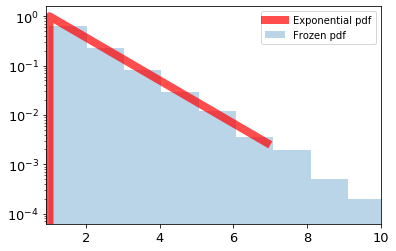

In [5]:
# Let's set up a plot to compare a standard exponential distribution to a histogram of discrete outcomes using the same parameters
fig, ax = plt.subplots(1, 1)
plt.yscale('log')

plt.tick_params(labelsize = 13)

# Let's create an x-axis that we can plot our results on
x = np.linspace(stats.expon.ppf(0.001),
               stats.expon.ppf(.999), 10000)

# Now let's plot the results of the exponential distribution against its input x-values
ax.plot(x, stats.expon.pdf(x, loc = 1, scale = 1),
       'r-', lw=8, alpha=.7, label='Exponential pdf')

# Let's create a function that exponentially distributes every value in x individually (discretely)
r = stats.expon.rvs(scale=1, loc=1, size=10000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.3, label="Frozen pdf")
ax.legend(loc=1, frameon=True)
plt.xlim(.9, 10)
plt.show()

- I see that the Frozen PDF shows measurements in an integer-based histogram format and that the Standardized Exponential PDF line (normalized from the logarithmic y-axis) follows my hypothetical distribution very closely.

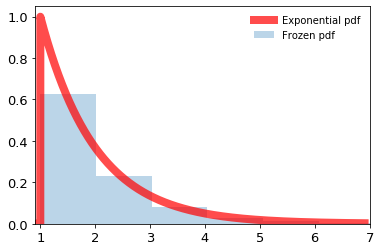

In [6]:
fig, ax = plt.subplots(1, 1)

plt.tick_params(labelsize = 13)

ax.plot(x, stats.expon.pdf(x, scale = 1, loc = 1),
       'r-', lw=8, alpha=.7, label='Exponential pdf')

ax.hist(r, density=True, histtype='stepfilled', alpha=0.3, label='Frozen pdf')
ax.legend(loc='best', frameon=False)
plt.xlim([0.9,7])
plt.show()

- This is the same data plot using a linear y-axis
- I can see that either way I plot the standard exponential distribution and my hypothetical distribution regarding the y-axis, they match each other quite well.
- Comparing the two graphs will show why it is probably more efficient to use the lognormal graph as opposed to the plot with two linear axes

## Section 3.1)
- If my data follows this exponential distribution, I need to determine a 'sigma' for a hypothetical measurement
- If I set my hypothetical signal measurement as a unitless value of 0.87 or less, but I unknowingly receive no signal in my data, then what is the probability that the data in question produces a signal that is equally or less signal-like than what I hoped to observe?
 - To answer this question, I need to create an integral over my exponential distribution
 - The 'stats.expon.cdf' function should return a hypothetical probability value when I input the correct upper x-bound, $\mu$, and $\sigma$
   - **NOTE:** Using the CDF function on an standard exponential distribution does not integrate from negative infinity like a standard normal distribution, it integrates from zero to the given value instead

In [15]:
stats.expon.cdf(0.87, loc=0, scale=1)

0.581048450752361

- The CDF function performs an integral from 0 to 0.87 on the x-axis, and the result returned is the area underneath the exponential curve between those values.
  - This means that the answer to my question is that the data has a 58.1% chance of returning a value that is equally or less-signal like than what I observed.
  - I can interpret this as saying that it will be very hard to know whether or not my measurement could be determined to be true or a false positive.
- Now I can use a standard normal distribution to find my sigma value 
  - What I want to know is, for a measurement with a 58.1% probability in the normal distribution curve, how far from the mean in terms of standard deviations would that measurement be?
  - Since the probability is huge, the 

In [22]:
sigma = stats.norm.cdf(0.581, loc=0, scale=1)
sigma

0.7193797732258039

- This says that measurement is 0.719$\sigma$ away from the mean
  - Therefore it is agreeing with the earlier statement that my hypothetical measurement could very likely be caused by the background, as opposed to being a real signal

## Section 4.1)
- If I change my hypothetical measurement value, what happens?
  - If my measurement value was very small, how would that change the probability of the data being mistaken as a false signal?

In [8]:
stats.expon.cdf(0.001, loc=0, scale=1)

0.0009995001666250082

- This is saying that any signal found between 0 and 0.001 has an extremely small chance of being equally or less signal-like than what I observe
  - Since there is very little data between 0 and 0.001 in this specific distribution, it is fair to estimate that the probability of finding a false signal here is highly unlikely

In [9]:
stats.expon.cdf(2.9, loc=0, scale=1)

0.9449767799435927

- The result above is saying that there is a 94% chance that I will observe something equally or less signal-like than what I observe as a hypothetical signal at 2.9 on the x-axis
- Let's see the sigma value for such a measurement, just as I did with the first hypthetical measurement

In [24]:
sigma2 = stats.norm.cdf(0.944977, loc=0, scale=1)
sigma2

0.8276646908164376

- We can see that our measurement is 0.828$\sigma$ away from the mean, which is not a high enough sigma value to be considered a real signal
  - We would want a value of at least 5$\sigma$ to consider our measurement a real measurement

# Non-continuous (Discrete) Distributions: 
## Section 1)
- Let's look at the binomial distribution and pose questions similar to those associated with my earlier distributions to understand further
- The binomial distribution has an integer-valued x-axis for showing the number of successes out of **n** total attempts, where **p** is the probability of that success, so if **n** = 10 and **p** = 1/2, I can hypothetically flip a coin 10 times and consider getting 'heads' a success since a coin holds that same probability value. My plotted results will most likely take the form of a binomial distribution
- The 'stats.binom()' function takes arguments for *'n'* and *'p'*
- I can define a set of values *'r'* that is a range from 0 to **n**, where **r** is each integer number of successes achievad in a sole experiment trial 
  - For 10 coin flips, **r** could be a value from 0 to 10 possible successes in total for each trial
  - *One trial does not affect the results of any other trial.* If I flip heads 5 times during one trial, there is no affect of the number of successes I have during the next trial. Results are completely independent and discrete in a binomial distribution
- Let's plot that coin flip example first and see what happens

Coin mean = μ = 5.0
Coin variance = σ = 2.5


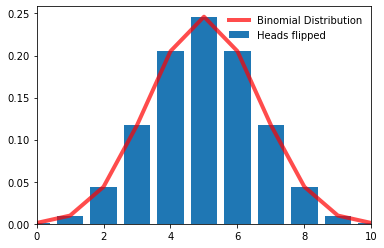

In [10]:
fig, ax = plt.subplots(1, 1)

# Define n, p, and r
n = 10
p = 0.5
r_list = list(range(n+1))

# Return the mean and variance in printed format above our plot
mean, var = stats.binom.stats(n, p)
print(f"Coin mean = \u03BC = {str(mean)}")
print(f"Coin variance = \u03C3 = {str(var)}")

# We want to find a distribution to plot for every number r
dist = [stats.binom.pmf(r, n, p) for r in r_list ]

# Let's plot our distribution and compare it to a binomial distribution fit with the same parameters
ax.bar(r_list, dist, label='Heads flipped')

ax.plot(r_list, dist,
       'r-', lw=4, alpha=.7, label='Binomial Distribution')

ax.legend(loc='best', frameon=False)
plt.xlim(0, 10)
plt.show()

- The chart shows that I have a 25% chance of flipping 5 "successes" (flipping heads 5 times and flipping tails 5 times) out of 10 tries
  - I can also see that there exists a chance, however small, that I could actually acheive 10 successes (all heads flipped) or 0 successes (no heads flipped) but the probability of those outcomes is very very small
  - The red "Binomial Distribution" line is not continuous. The points at each integer value are because the 'ax.plot()' function is connecting integer dots that are associated with **x** = 'r_list' and **y** = 'dist'

## Section 1.C)
- What happens when the outcome isn't 1 of 2 options, like rolling a 6-sided die?
- I can adjust the *'p'* probability value to any value between 0 and 1 in the function's parameters, so for a 6-sided die, what is the chance of rolling any value between 1 and 4, if I roll my favorite die piece 100 times?
- Binomials need two outcomes, not six. Therefore, I can define *'success'* in this question as the die having a value of 1-4, so a 'failure' would be having a value of 5-6. The binomial operator requires that there only be a successful outcome with a fixed probability 'p', and a failed outcome with a fixed probability of 1-'p'
 - Think of the binomial function as asking the question *'True or False?'*, you can only ever answer with those two options, similar to a boolean variable

Dice mean = μ = 66.66666666666666
Dice variance = σ = 22.22222222222222


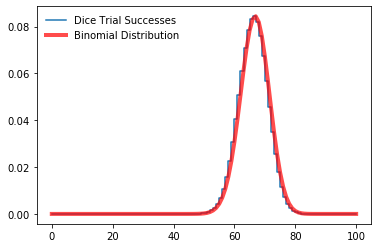

In [25]:
fig, ax = plt.subplots(1, 1)

# Define n, p, and r of our newly posed question
n2 = 100
p2 = (4 / 6)
r_list2 = list(range(n2+1))

# Return the mean and variance in printed format above our new plot
mean2, var2 = stats.binom.stats(n2, p2)
print(f"Dice mean = \u03BC = {str(mean2)}")
print(f"Dice variance = \u03C3 = {str(var2)}")

# We want to create a distribution to plot for every outcome for r in r_list2
dist2 = [stats.binom.pmf(r2, n2, p2) for r2 in r_list2 ]

# Let's plot our distribution and compare it to a binomial distribution fit with the same parameters for success and trials
ax.step(r_list2, dist2, label='Dice Trial Successes')

ax.plot(r_list2, dist2,
        'r-', lw=4, alpha=.7, label='Binomial Distribution')

ax.legend(loc='best', frameon=False)
#plt.xlim(0,100)
plt.show()

- Now I must interpret the massive amount of potential results on our plot
- The mean result for the die roll success is 66-67 successes. That's what my stairstep plot is trying to show me. The most likely outcome is that when I roll my die 100 times, 2/3 of those rolls will fall as a number between 1 and 4, while 1/3 will fall on 5 or 6. 
 - This is an expected result. On any given roll, the probability of a number between 1 and 4 coming up is 4/6 (or 2/3), so multiplying 2/3 by 100 tries gives us the same answer as my binomial distribution's $\mu$.
- I can also see that the binomial distribution line with the same parameters fits the bar graph extremely well. This is probably because of the increased number of total attempts posed in my question.
  - For example, if I had changed the total amount of attempts to 4, the bar graph would not match the exponential distribution as well because there were only four results as opposed to 100

## Section 1.D)
- The binomial distribution is discrete. This means that I am counting an integer value of outcomes (for example, number of coins that land on heads), results that can only be integer values. 
- Since the outcomes are discrete, the probabilities associated with them are specific (or discrete) to the situation being observed and measured. The probability of rolling a 1 on a six-sided die is not affected by the probability of the roll I just made a minute ago. 
- This is why I use a bar chart to show the actual experiment results of the situation posed. The bars denote the specific integer counts of successes that occur hypothetically (such as 5 coins flipped to heads as opposed to 6)
- But I see a mean on our die roll graph of 66.666666666... so on and so forth. How is that possible if the outcomes can only be integer values? How can the mean be a non-integer number if all of the values calculated for the mean are integers? It's because the mean is an average! In fact, the mean of any binomial distribution is equal to **n\*p**! 
  - In this case: $\sigma_{exp}=n*p=100*\frac{2}{3}=66.666...$
  - So for 100 rolls with a 2/3 success rate, the mean will be 66.66666666666 even though rolls and successes are both integer counting numbers.